In [2]:
from pyspark.rdd import RDD
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
RDDread = sc.textFile("crime_homicide_subset.csv")
RDDread.collect()

[u'year,mont,week,hour,start,day,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,CCN,XBLOCK,YBLOCK,START_DATE,END_DATE,lat,long,accuracy',
 u'2011,1,1,6,1/1/2011,0,1/1/2011 6:55,MIDNIGHT,SEX ABUSE,OTHERS,600 - 699 BLOCK OF 46TH PLACE SE,6,604,7,7F,Cluster 33,009907 2,9907,Precinct 103,11000272,405593,134807,1/1/2011 2:19,1/1/2011 6:00,38.8421079,-76.9874456,route',
 u'2011,1,1,17,1/1/2011,0,1/1/2011 17:29,EVENING,SEX ABUSE,OTHERS,100 - 299 BLOCK OF P STREET NW,5,501,5,5E,Cluster 21,004600 2,4600,Precinct 19,11000422,398814,137975,1/1/2011 5:45,1/1/2011 6:59,38.94561,-77.0169636,street_address',
 u'2011,1,1,19,1/1/2011,0,1/1/2011 19:30,EVENING,SEX ABUSE,GUN,5100 - 5299 BLOCK OF ASTOR PLACE SE,6,604,7,7E,Cluster 33,009905 1,9905,Precinct 104,11000469,406348,135451,1/1/2011 19:15,1/1/2011 19:20,38.899237,-76.942409,street_address',
 u'2011,1,2,0,1/1/2011,1,1/2/2011 0:00,MIDNIGHT,HOMICIDE,GUN,3400 - 3499 BLOCK OF 13T

In [2]:
RDDread = sc.textFile("race.csv")
RDDread.collect()

[u'ward,race,population,percent_of_total',
 u'1,white,36864,40.0',
 u'1,black_or_african_american,24794,26.9',
 u'1,hispanic_or_latino,15827,17.2',
 u'1,some_other_race,7875,8.5',
 u'1,asian,3156,3.4',
 u'1,two_or_more_races,3068,3.3',
 u'1,american_indian,393,0.4',
 u'1,three_or_more_races,299,0.3',
 u'2,white,57317,65.4',
 u'2,black_or_african_american,10079,11.5',
 u'2,hispanic_or_latino,7570,8.6',
 u'2,some_other_race,2836,3.2',
 u'2,asian,6942,7.9',
 u'2,two_or_more_races,2456,2.8',
 u'2,american_indian,220,0.3',
 u'2,three_or_more_races,229,0.3',
 u'3,white,64447,77.5',
 u'3,black_or_african_american,3860,4.6',
 u'3,hispanic_or_latino,5796,7.0',
 u'3,some_other_race,1186,1.4',
 u'3,asian,5146,6.2',
 u'3,two_or_more_races,2316,2.8',
 u'3,american_indian,170,0.2',
 u'3,three_or_more_races,215,0.3',
 u'4,white,18601,20.6',
 u'4,black_or_african_american,44459,49.3',
 u'4,hispanic_or_latino,14179,15.7',
 u'4,some_other_race,8145,9.0',
 u'4,asian,1218,1.3',
 u'4,two_or_more_races,2957

In [3]:
RDDread = sc.textFile("population.csv")
RDDread.collect()

[u'ward,population',
 u'1,92276',
 u'2,87649',
 u'3,83136',
 u'4,90250',
 u'5,79280',
 u'6,80501',
 u'7,72940',
 u'8,72181']

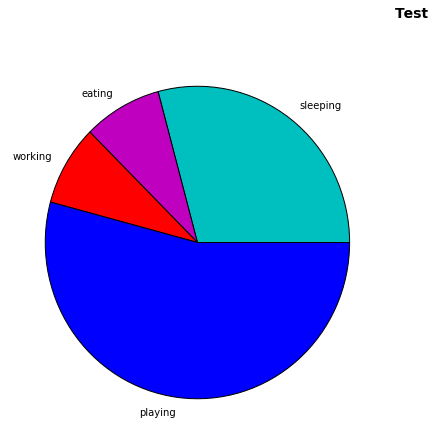

In [13]:
slices = [7, 2, 2, 13]
activities = ['sleeping', 'eating', 'working', 'playing']
cols = ['c', 'm', 'r', 'b']

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Test', fontsize=14, fontweight='bold')

pieke = fig.add_subplot(121)

pieke.pie(slices, labels=activities, colors=cols)

plt.show()




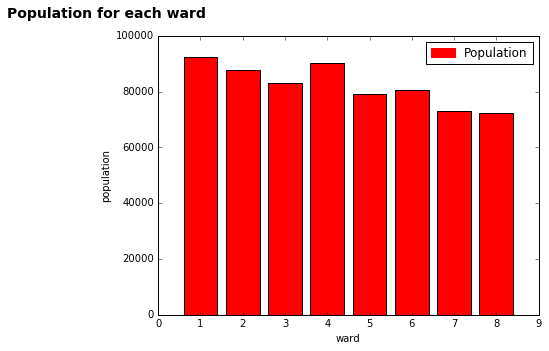

In [11]:
import matplotlib.pyplot as plt 

RDDread = sc.textFile("population.csv")

header = RDDread.take(1)[0]

data = RDDread.filter(lambda l: l != header) \
            .map(lambda x: (float(x.split(',')[0]), float(x.split(',')[1]))) 

x_axis = data.keys().collect()
y_axis = data.values().collect()

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Population for each ward', fontsize=14, fontweight='bold')

population = fig.add_subplot(122)

population.set_xlabel(header.split(',')[0])
population.set_ylabel(header.split(',')[1])
population.bar(x_axis, y_axis, color='red', align='center')

red_patch = mpatches.Patch(color='red', label='Population')
plt.legend(handles=[red_patch])

plt.show()

